<div class="alert alert-danger" role="alert">
    <span style="font-size:20px">&#9888;</span> <span style="font-size:16px">This is a read-only notebook! If you want to make and save changes, save a copy by clicking on <b>File</b> &#8594; <b>Save a copy</b>. If this is already a copy, you can delete this cell.</span>
</div>

<h1>Exploratory Factor Analysis<span class="tocSkip"></span></h1>

**Note: This notebook is initially built based on approaches described online. Further work can be done to create more streamlined functionality that matches OW's preferred approaches.**

Exploratory Factor Analysis (EFA) is a multivariate statistical method that aims to identify the smallest number of hypothetical constructs, also known as factors, dimensions, latent variables, synthetic variables, or internal attributes, responsible for the variation of measured variables. 

EFA is used to analyze the correlation matrix of measured variables and separate the total variance into common variance (communality) and unique variance. 

The purpose of EFA is to find a solution where each factor is loaded by several salient variables and each variable has a salient loading on one factor and trivial loadings on the remaining factors.

This article covers best-practices: https://journals.sagepub.com/doi/full/10.1177/0095798418771807

<h1>Table of Contents<span class="tocSkip"></span></h1>

<ul class="toc-item"><li><span><a href="#Step-by-step-example-of-Exploratory-Factor-Analysis" data-toc-modified-id="Step-by-step-example-of-Exploratory-Factor-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Step by step example of Exploratory Factor Analysis</a></span></li><li><span><a href="#Assess-the-suitability-of-the-dataset-for-EFA" data-toc-modified-id="Assess-the-suitability-of-the-dataset-for-EFA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Assess the suitability of the dataset for EFA</a></span><ul class="toc-item"><li><span><a href="#Identifying-correlations" data-toc-modified-id="Identifying-correlations-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Identifying correlations</a></span><ul class="toc-item"><li><span><a href="#Bartlett's-Test-of-Sphericity" data-toc-modified-id="Bartlett's-Test-of-Sphericity-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Bartlett's Test of Sphericity</a></span></li><li><span><a href="#Correlation-matrix-and-heatmap" data-toc-modified-id="Correlation-matrix-and-heatmap-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Correlation matrix and heatmap</a></span></li><li><span><a href="#Variable-clustering-(hierarchical-clustering)" data-toc-modified-id="Variable-clustering-(hierarchical-clustering)-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Variable clustering (hierarchical clustering)</a></span></li></ul></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Outliers</a></span></li><li><span><a href="#Kaiser-Meyer-Olkin-(KMO)-statistic-to-measure-sampling-adequacy" data-toc-modified-id="Kaiser-Meyer-Olkin-(KMO)-statistic-to-measure-sampling-adequacy-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Kaiser-Meyer-Olkin (KMO) statistic to measure sampling adequacy</a></span></li></ul></li><li><span><a href="#Determine-the-number-of-factors-to-retain" data-toc-modified-id="Determine-the-number-of-factors-to-retain-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Determine the number of factors to retain</a></span><ul class="toc-item"><li><span><a href="#Kaiser-criterion-(precursor-to-Parallel-Analysis)-and-Scree-plot" data-toc-modified-id="Kaiser-criterion-(precursor-to-Parallel-Analysis)-and-Scree-plot-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Kaiser criterion (precursor to Parallel Analysis) and Scree plot</a></span></li><li><span><a href="#Parallel-Analysis-(PA)" data-toc-modified-id="Parallel-Analysis-(PA)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Parallel Analysis (PA)</a></span></li><li><span><a href="#Minimum-Average-Partial-(MAP)-test" data-toc-modified-id="Minimum-Average-Partial-(MAP)-test-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Minimum Average Partial (MAP) test</a></span></li></ul></li><li><span><a href="#Select-the-estimation-method" data-toc-modified-id="Select-the-estimation-method-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Select the estimation method</a></span><ul class="toc-item"><li><span><a href="#Comparison-of-loadings-for-the-first-two-factors" data-toc-modified-id="Comparison-of-loadings-for-the-first-two-factors-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Comparison of loadings for the first two factors</a></span></li></ul></li><li><span><a href="#Rotate-factors" data-toc-modified-id="Rotate-factors-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Rotate factors</a></span><ul class="toc-item"><li><span><a href="#Factor-matrix-table" data-toc-modified-id="Factor-matrix-table-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Factor matrix table</a></span></li></ul></li><li><span><a href="#Interpret-the-results" data-toc-modified-id="Interpret-the-results-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Interpret the results</a></span></li><li><span><a href="#Evaluate-the-factor-solution" data-toc-modified-id="Evaluate-the-factor-solution-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Evaluate the factor solution</a></span><ul class="toc-item"><li><span><a href="#Sufficiency-test" data-toc-modified-id="Sufficiency-test-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Sufficiency test</a></span></li></ul></li></ul>

**We begin by importing key libraries**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# Developer's code to automatically update functions sourced in from the modules
%load_ext autoreload
%autoreload 2

# Add path of the folder 'resources' to the path from which we can import modules  
import sys
sys.path.append('../../utilities')

<h3>Difference between Factor Analysis and Principal Component Analysis<span class="tocSkip"></span></h3>

In short, you can think of Factors as 'hidden' variables that explain your observed variables. Whereas PCA are combinations of your observed variables that explains all the data (including noise)

Description|Illustration
-|-
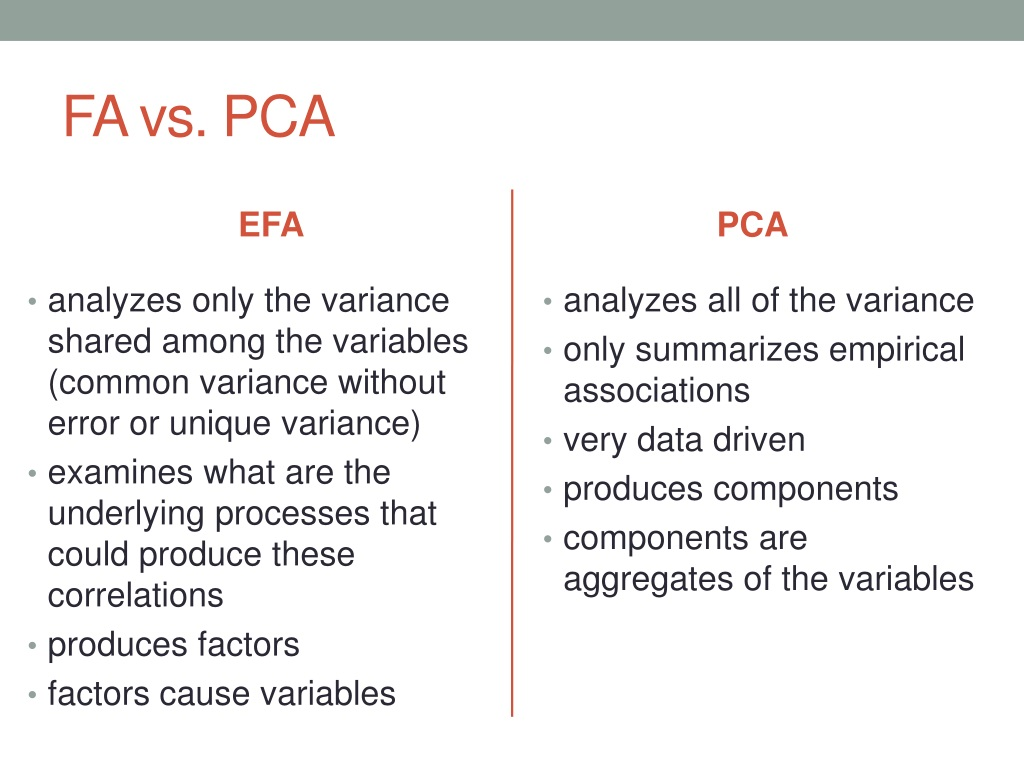 | 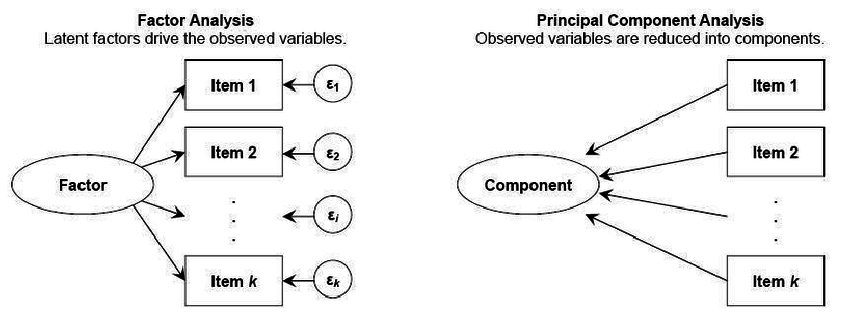

# Step by step example of Exploratory Factor Analysis

We follow this process:

1. **Assess the suitability of the dataset for EFA**: Ensure that the dataset is appropriate for factor analysis. Check for significant correlations among variables, lack of multicollinearity, not too many extreme outliers, and sufficient sample size.

2.  **Determine the number of factors to retain**: Use multiple criteria such as parallel analysis, Minimum Average Partial (MAP) test, and scree plot to suggest the range of plausible factor solutions. Evaluate these solutions by selecting the smallest and largest number of factors suggested by these criteria, and consider relevant theory and prior research.

3. **Select the estimation method**: Choose between common estimation methods like Maximum Likelihood (ML) and iterated Principal Axis (PA) to estimate the relationships between measured variables and factors.

4. **Rotate factors**: Apply rotation techniques like Varimax or Promax to simplify the factor structure and make it easier to interpret.

5. **Interpret the results**: Focus on pattern coefficients to interpret the factors. Ensure that each factor is saliently loaded by at least three variables, each variable loads saliently on only one factor, and each factor demonstrates internal consistency reliability.

6. **Evaluate the factor solution**: Assess the adequacy of the solution by considering the internal consistency reliability, theoretical meaningfulness, and the absence of complex loadings.

Remember to be cautious about overfactoring and underfactoring, as they can alter the true factor loadings and lead to incorrect interpretations.

**Load in data**

We use dataset from here: https://osf.io/z2hr3/, which was used for the paper https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7898259/

In [3]:
dataset = pd.read_csv("sample_input/EFA sample.csv").dropna()
dataset.head()

,compdom,compgen,riskgen,riskfinan,riskrecrea,indepgen,indephelp,indepprob,commother,commdecis,...,qualfamarg,careemot,carephys,carefut,workspeed,workrep,workemot,workphys,workrisk,workhaz
1,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,4.0,4.0,...,2.0,1.0,1.0,1.0,3.0,4.0,4.0,4.0,1.0,3.0
2,1.0,1.0,1.0,1.0,1.0,5.0,5.0,3.0,5.0,1.0,...,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,5.0,4.0,5.0,1.0,1.0,...,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,3.0,5.0,5.0,5.0,4.0,5.0,...,4.0,3.0,3.0,5.0,2.0,2.0,1.0,3.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,5.0,2.0,...,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**Alternative data with FIFA soccer attributes**

This data yields less clean factors, so hence is commented out

In [4]:
# dataset = pd.read_csv("sample_input/soccer.csv")
# dataset.head()

# variable_names = [
#     'fix_crossing', 'fix_short_passing', 'fix_finishing', 'fix_volleys', 'fix_heading_accuracy', 'fix_dribbling', 'fix_curve', 'fix_free_kick_accuracy',
#     'fix_long_passing', 'fix_ball_control', 'fix_acceleration', 'fix_sprint_speed', 'fix_agility', 'fix_reactions', 'fix_balance', 'fix_shot_power', 'fix_jumping'
# ]

# dataset = dataset[variable_names].dropna()

# Assess the suitability of the dataset for EFA

- If the data doesn't have correlations, then there will not be a small set of factors that drive the variables in the data.
- If the data has major outliers that are spurious, the correlations in the data may not be representative
- If the data is too small a sample of the population, then the correlations in the data may not be representative. At minimu

## Identifying correlations

A few common techniques for analyzing correlations: 
- Bartlett's Test of Sphericity
- Simple correlation matrix / heatmap
- Variable clustering (hierarchical clustering). More examples of this is provided in "dimensionality_reduction/[template] Variable clustering.ipynb"

### Bartlett's Test of Sphericity

It tests whether the correlation coefficients are all 0. The test computes the probability that the correlation matrix has significant correlations among at least some of the variables in a dataset, a prerequisite for factor analysis to work.

H0: The matrix of population correlations is equal to I (Identify matrix, which means everything is not correlated). H1: The matrix of population correlations is not equal to I.

You will want to have a p-value that is low (e.g. lower than 5%). Note that this doesn't signify strong correlations, just that there are some correlations.

In [32]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
bartlett_stat, bartlett_p = calculate_bartlett_sphericity(dataset)

bartlett_p

0.0

### Correlation matrix and heatmap

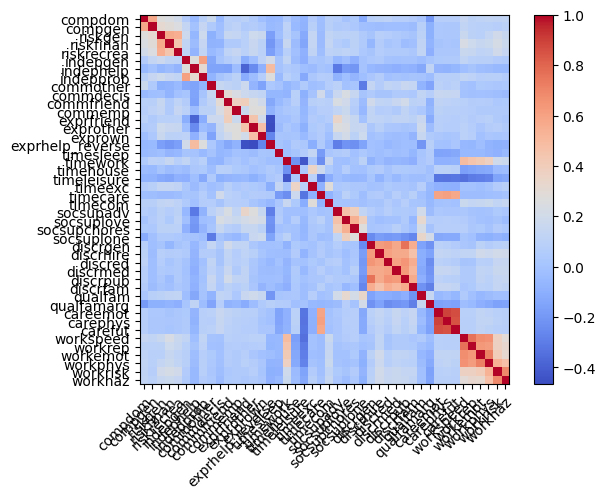

In [5]:
# Calculate the correlation matrix
corr_matrix = dataset.corr()

fig, ax = plt.subplots()
heatmap = ax.imshow(corr_matrix, cmap='coolwarm')

# Add colorbar
cbar = plt.colorbar(heatmap)

# Set the tick labels and axis labels
ax.set_xticks(np.arange(corr_matrix.shape[1]))
ax.set_yticks(np.arange(corr_matrix.shape[0]))
ax.set_xticklabels(dataset.columns)
ax.set_yticklabels(dataset.columns)

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Show the plot
plt.show()

### Variable clustering (hierarchical clustering)

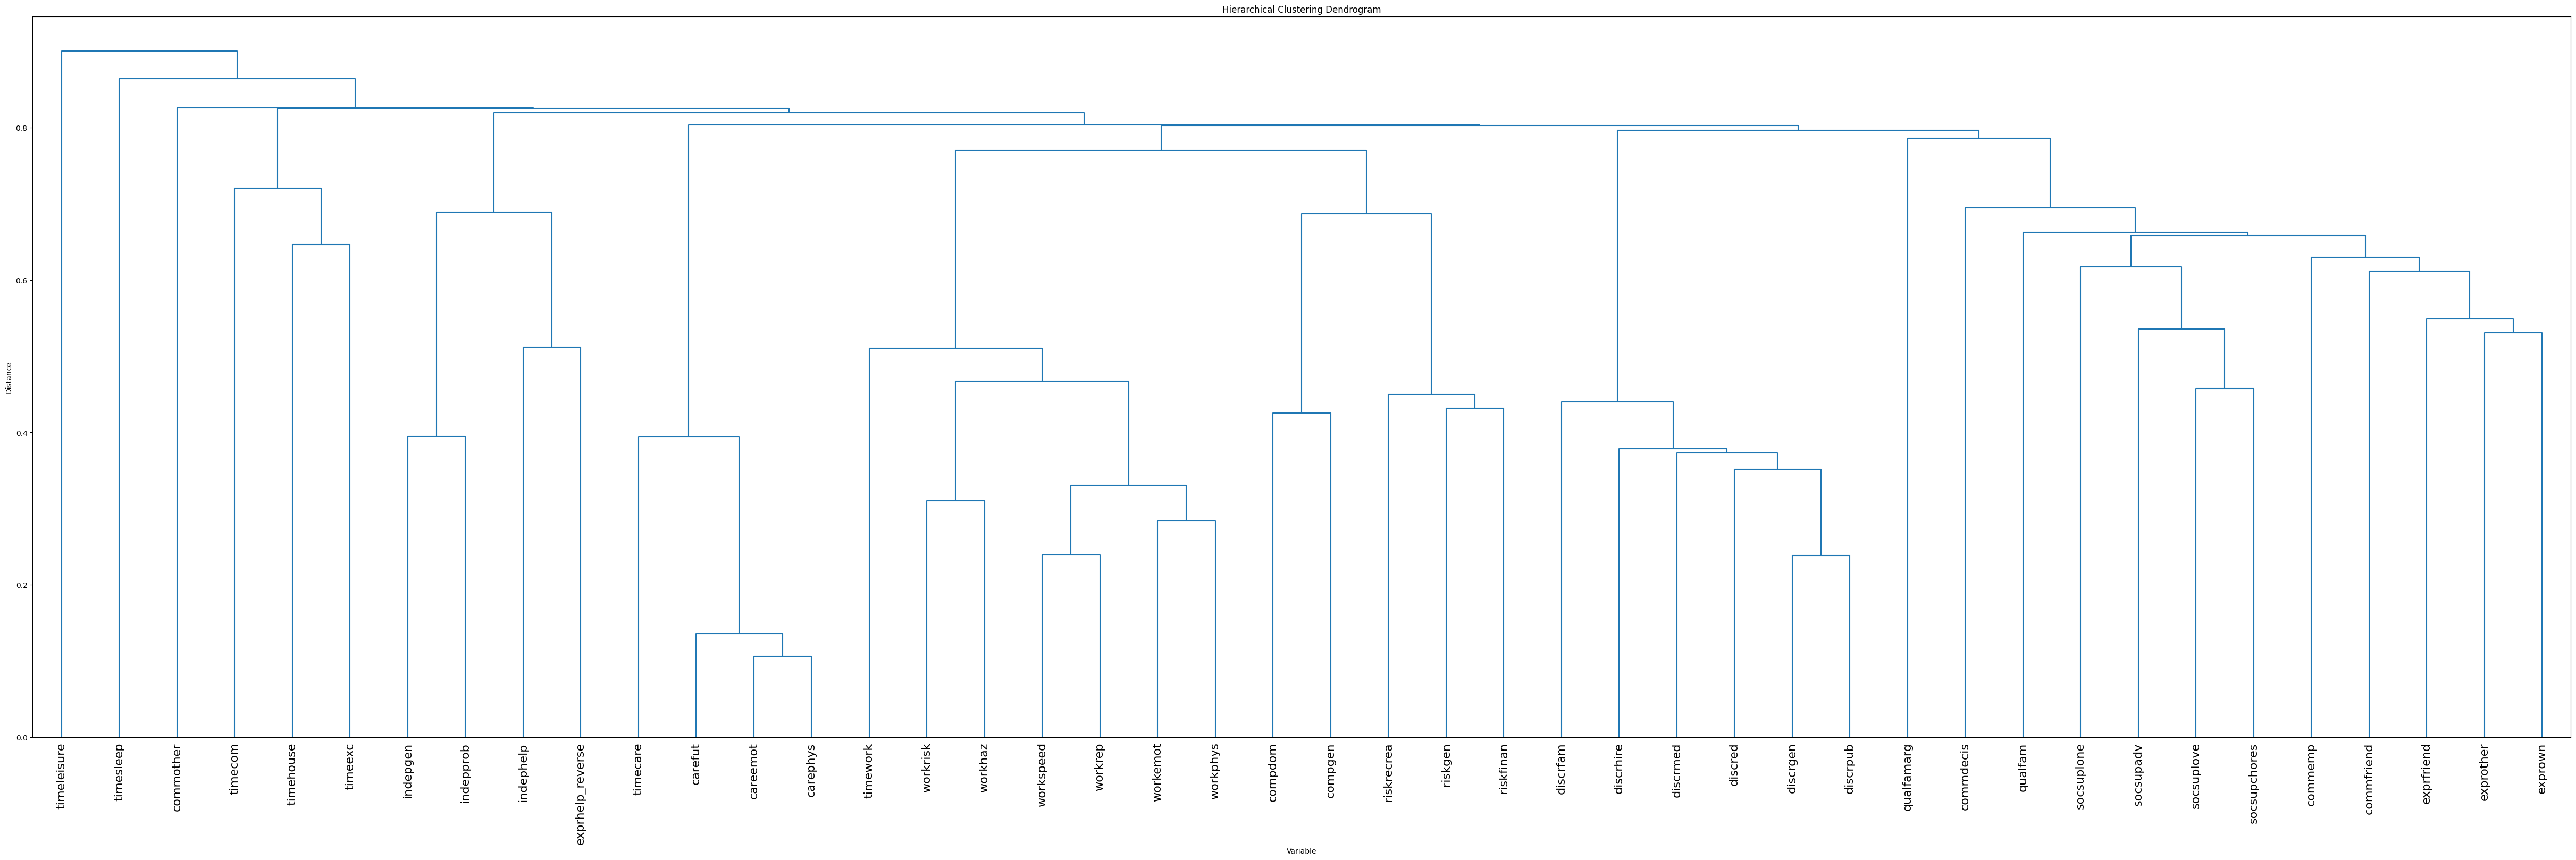

In [6]:
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram

# Variable clustering example
matrix_t = dataset.values.transpose()
distance = pdist(matrix_t, metric='correlation')
result = linkage(distance, method="single")

var_num = len(dataset.columns)
figure = plt.figure(figsize=(var_num * 1.4, var_num * 0.4))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Variable')
plt.ylabel('Distance')

variable_plot = dendrogram(
    result,
    leaf_rotation=90.,  # rotates the x axis labels - automatic rotation looked bad
    leaf_font_size=16,  # font size for the x axis labels - automatic rotation looked bad
    labels=np.array(list(map(lambda x: x[:20], dataset))),
    # truncate variable name to 20 characters max
    color_threshold=0  # turn off coloring of tree
)

## Outliers

Simple method used here, each variable is plotted using a box-and-whisker plot and histogram

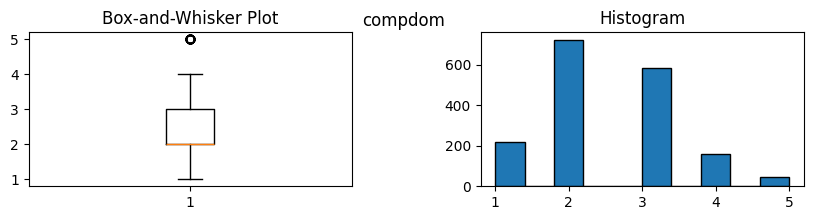

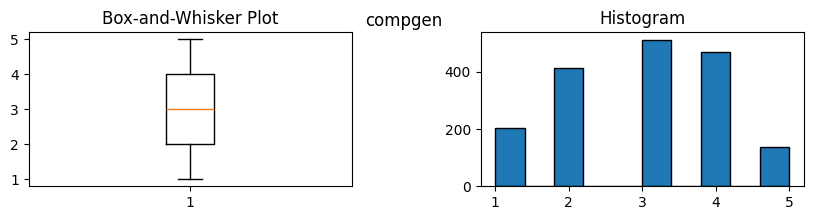

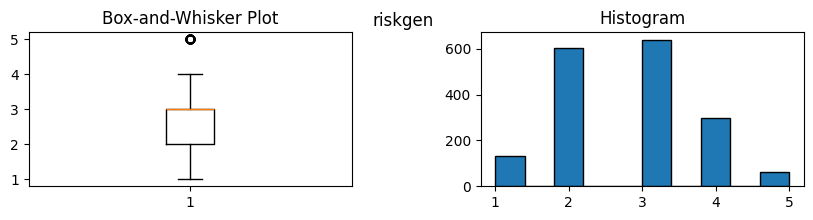

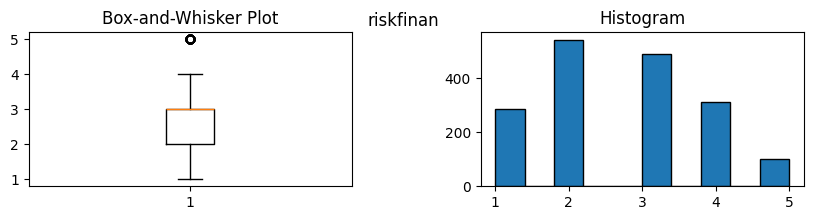

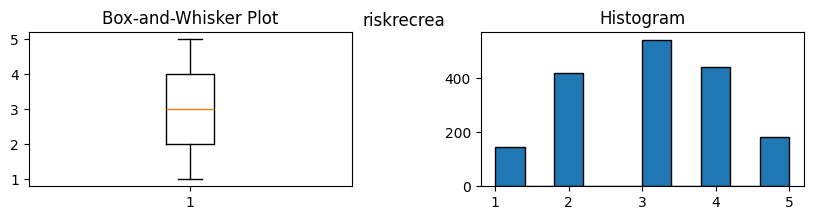

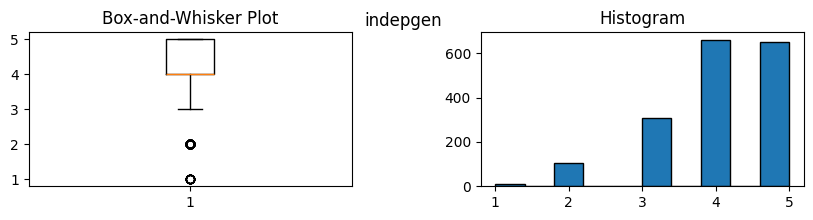

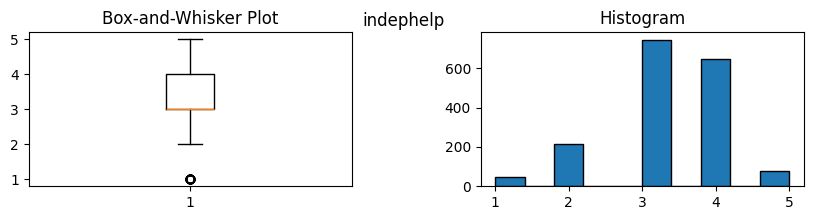

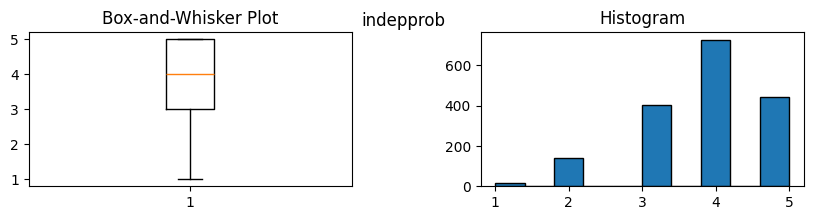

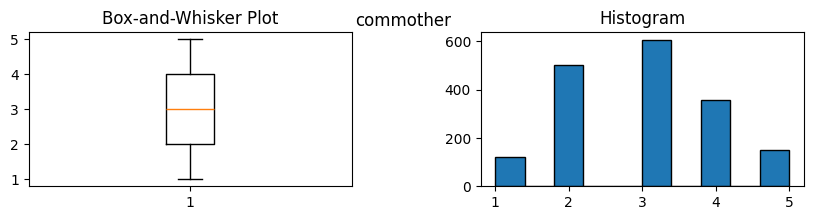

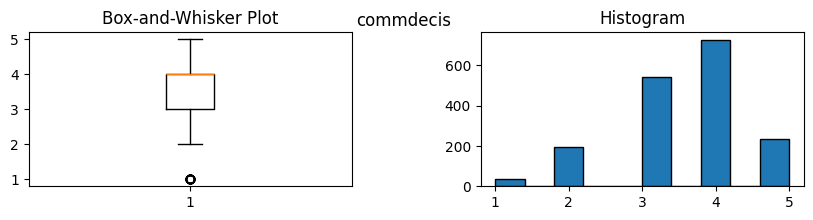

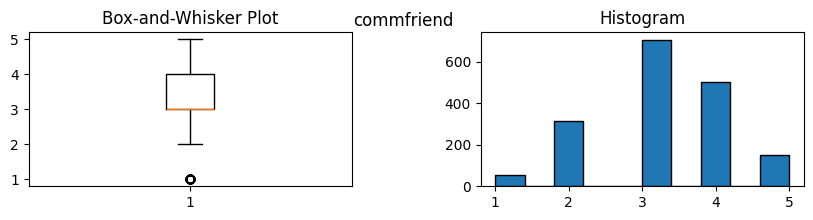

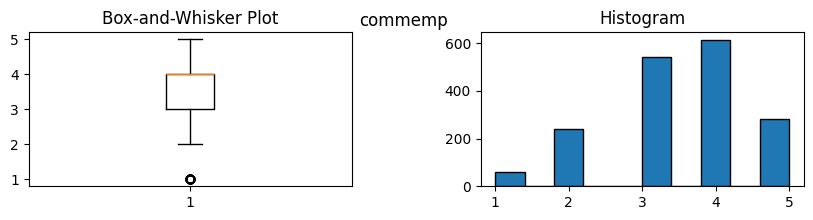

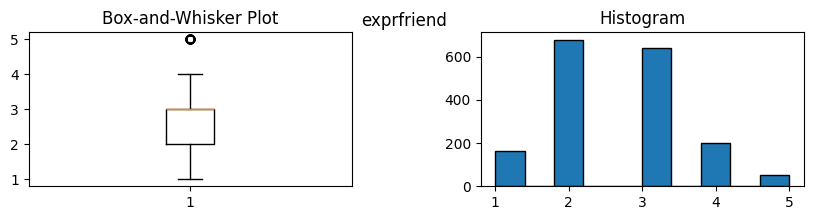

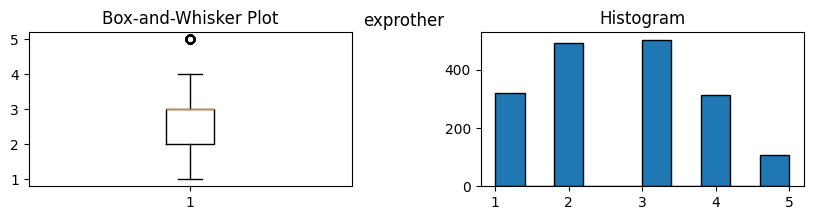

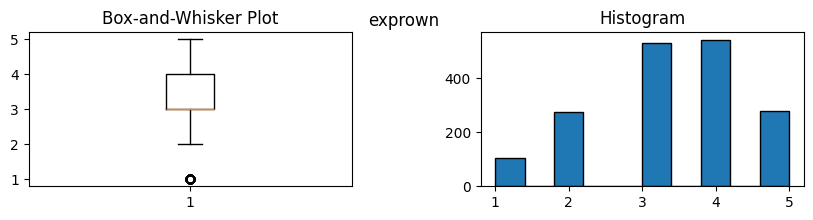

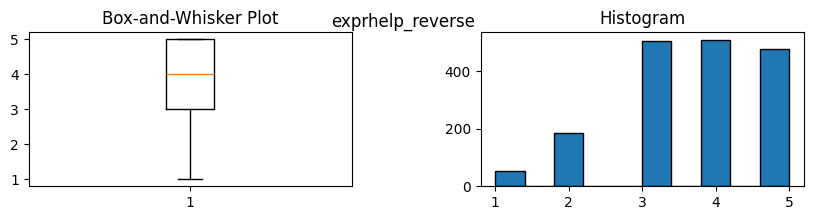

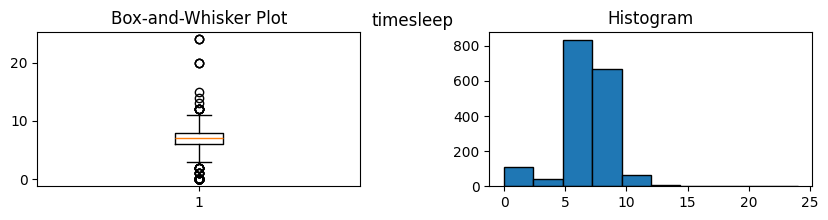

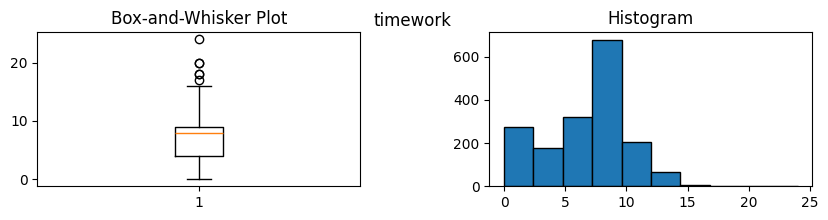

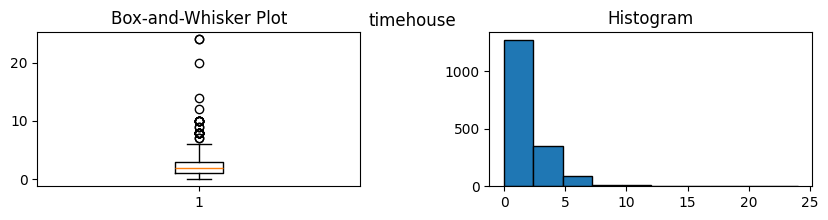

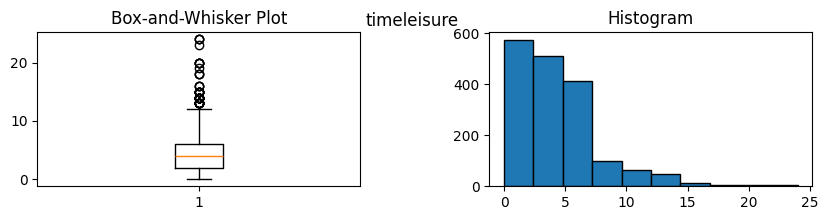

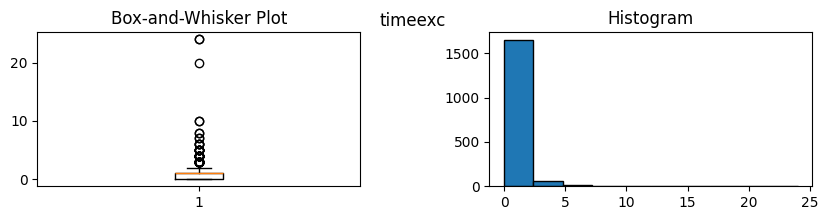

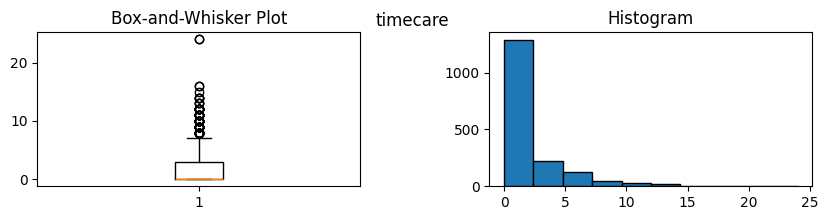

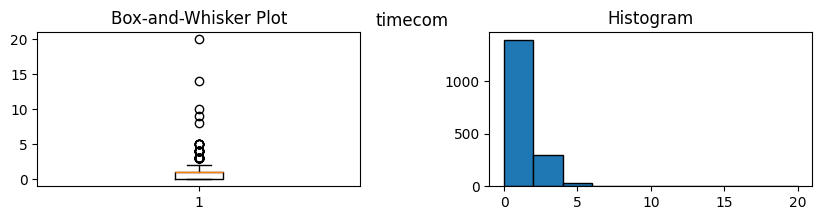

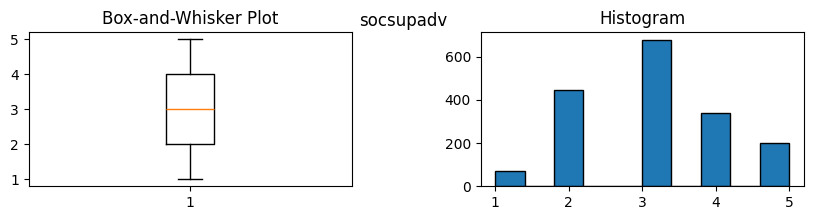

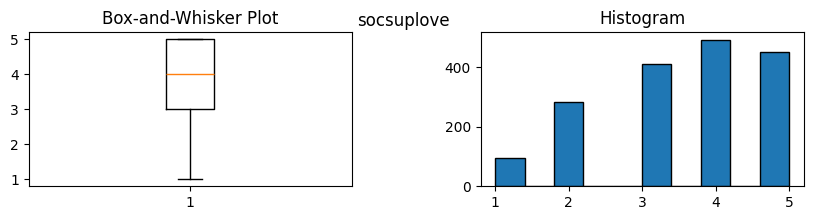

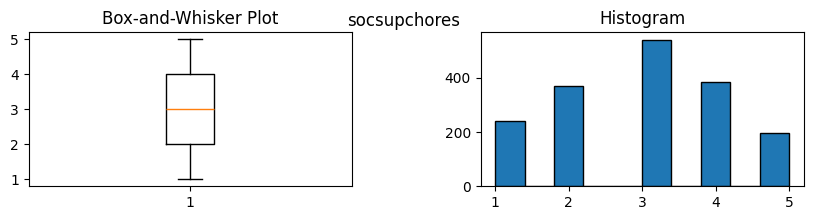

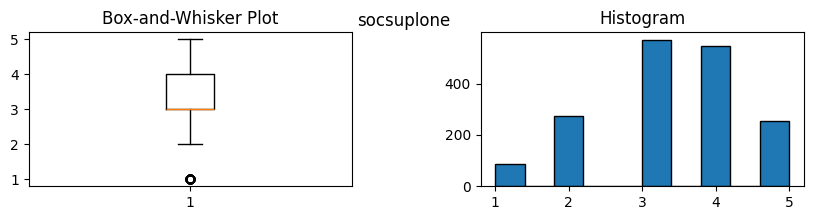

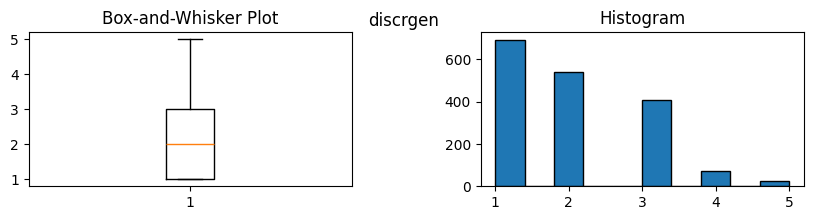

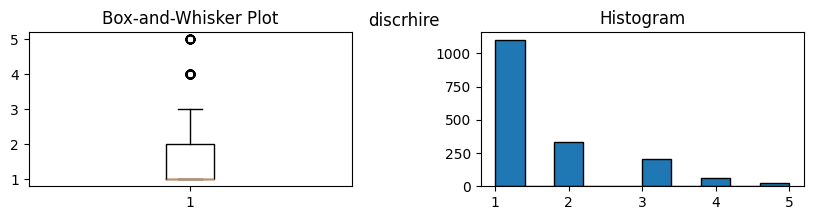

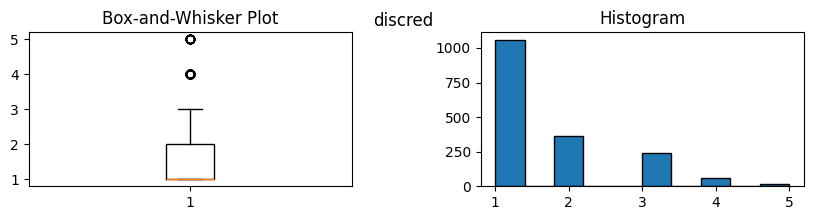

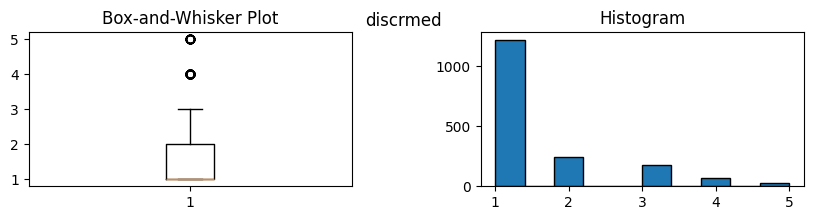

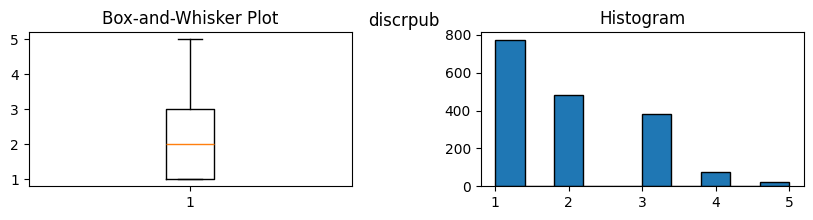

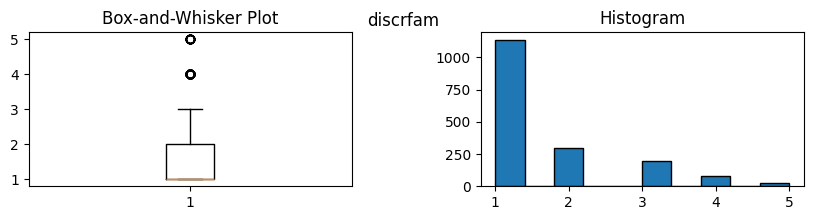

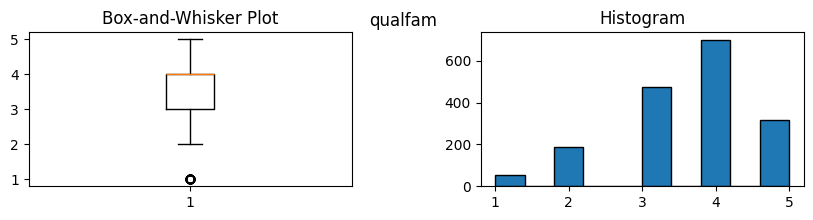

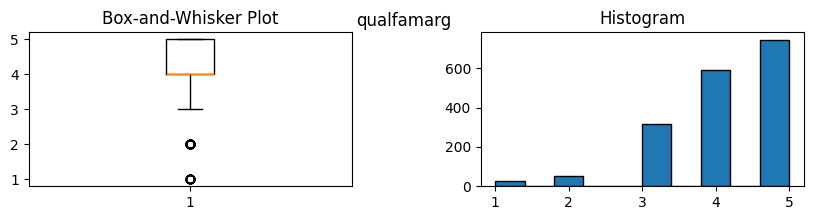

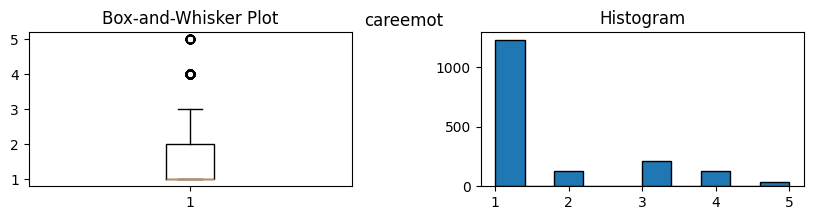

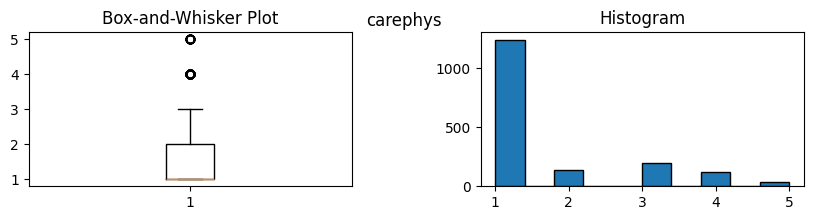

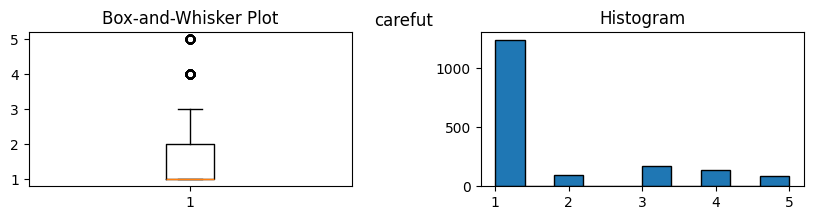

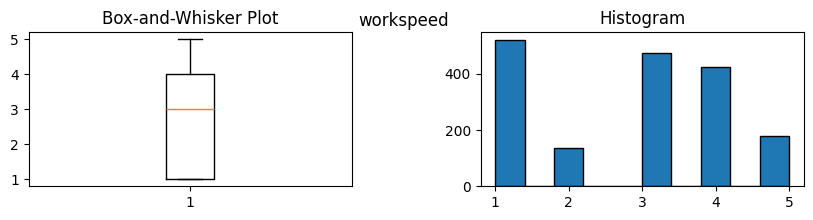

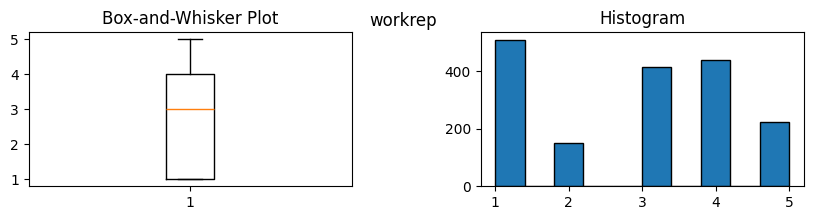

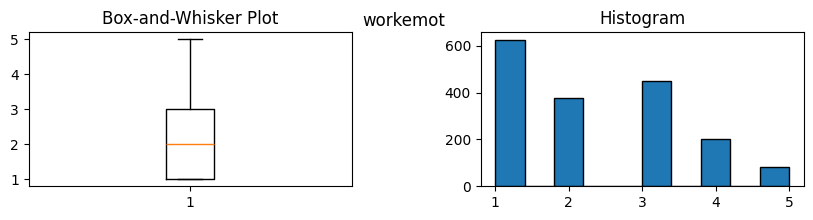

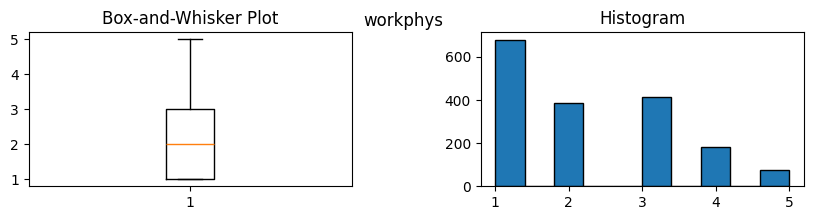

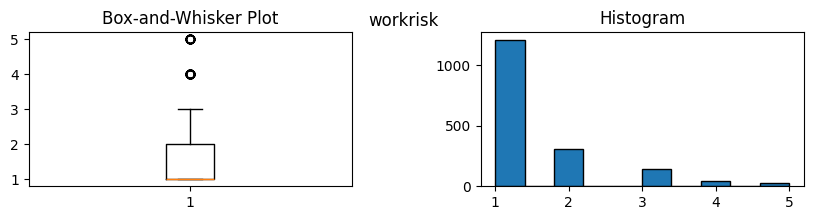

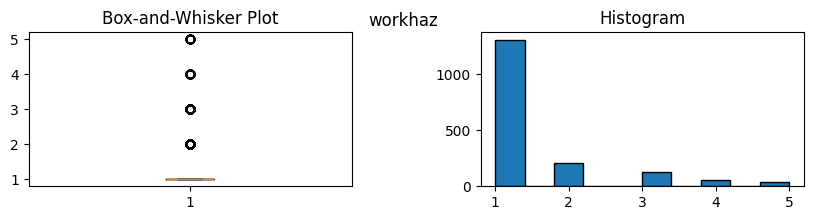

In [7]:
for colname in dataset.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2))
    
    # Plot the box-and-whisker plot
    ax1.boxplot(dataset[colname])
    ax1.set_title('Box-and-Whisker Plot')

    # Plot the histogram
    ax2.hist(dataset[colname], bins=10, edgecolor='black')
    ax2.set_title('Histogram')

    # Add labels and title to the figure
    fig.suptitle(colname)

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.4)

    # Display the plot
    plt.show()


## Kaiser-Meyer-Olkin (KMO) statistic to measure sampling adequacy

KMO returns values between 0 and 1, and measures sampling adequacy for each variable in the model and the complete model. The higher the statistic, the better. https://www.statisticshowto.com/kaiser-meyer-olkin/ puts forth a rule of thumb:
* KMO values between 0.8 and 1 indicate the sampling is adequate.
* KMO values less than 0.6 indicate the sampling is not adequate and that remedial action should be taken. Some authors put this value at 0.5, so use your own judgment for values between 0.5 and 0.6.
* KMO Values close to zero means that there are large partial correlations compared to the sum of correlations. In other words, there are widespread correlations which are a large problem for factor analysis.

In [8]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_by_variable,kmo_overall=calculate_kmo(dataset)

**Overall score**

In [9]:
kmo_overall

0.8294242551719392

**By variable**

In [10]:
pd.DataFrame(dict(zip(dataset.columns, kmo_by_variable)),index=[0])

,compdom,compgen,riskgen,riskfinan,riskrecrea,indepgen,indephelp,indepprob,commother,commdecis,...,qualfamarg,careemot,carephys,carefut,workspeed,workrep,workemot,workphys,workrisk,workhaz
0,0.705668,0.704859,0.790958,0.838645,0.842059,0.681902,0.839574,0.696941,0.730852,0.810218,...,0.878007,0.820509,0.824983,0.877534,0.85616,0.868411,0.891547,0.88506,0.811433,0.781569


# Determine the number of factors to retain

Use multiple criteria such as parallel analysis, Minimum Average Partial (MAP) test, and scree plot to suggest the range of plausible factor solutions. Evaluate these solutions by selecting the smallest and largest number of factors suggested by these criteria, and consider relevant theory and prior research.

Useful reading: https://scholarworks.umass.edu/cgi/viewcontent.cgi?article=1305&context=pare

## Kaiser criterion (precursor to Parallel Analysis) and Scree plot

Simply counting the number of eigenvalues that are greater than 1, and the scree plot simply plots the eigenvalues

Number of eigenvalues above 1: 11


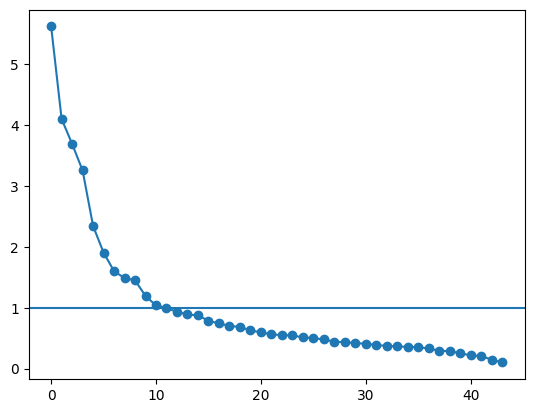

In [11]:
eigenvalues = PCA().fit(StandardScaler().fit_transform(dataset)).explained_variance_
print(f"Number of eigenvalues above 1: {sum(eigenvalues > 1)}")
ax = plt.plot(eigenvalues, marker = 'o')
plt.axhline(1)
plt.show()

In [12]:
# Note, you can also get the eigenvalues while you are running the Factor Analysis function
fa = FactorAnalyzer(rotation=None)
fa.fit(dataset)
ev, v = fa.get_eigenvalues()
v

array([ 5.00630244e+00,  3.52047743e+00,  2.99174546e+00,  2.45612622e+00,
        1.53432036e+00,  1.10419372e+00,  8.09504547e-01,  6.68726494e-01,
        6.10496936e-01,  3.98708754e-01,  1.97550201e-01,  1.74242462e-01,
        1.58309016e-01,  7.91404254e-02,  4.42768263e-02,  5.60075881e-04,
       -9.69229665e-03, -4.06648570e-02, -5.48720876e-02, -8.06855203e-02,
       -9.60754065e-02, -1.23688371e-01, -1.49301255e-01, -1.53384698e-01,
       -1.73196979e-01, -1.80554135e-01, -1.90476639e-01, -2.12661223e-01,
       -2.33450076e-01, -2.57241866e-01, -2.73279928e-01, -2.85578750e-01,
       -3.21043782e-01, -3.29448218e-01, -3.49265095e-01, -3.58066439e-01,
       -3.97210615e-01, -4.31726096e-01, -4.83137660e-01, -5.29580879e-01,
       -5.46706327e-01, -5.72099335e-01, -6.85910826e-01, -7.17157065e-01])

## Parallel Analysis (PA)

Parallel analysis (PA) is an effective stopping rule that uses eigenvalues of the data to help determine the number of factors. It accounts for spurious correlation by comparing to a the eigenvalues of randomly generated data. Read more here: https://www.statstodo.com/ParallelAnalysis.php. 

This started off as Kaiser’s eigenvalue-greater-than-one rule (K1), and was then modified to account for spurious correlations and named Horn’s Parallel Analysis 

In [13]:
dataset_std = StandardScaler().fit_transform(dataset) # Standardize the dataset

# Perform PCA analysis on n-1 factors of the dataset
pca = PCA(dataset.shape[1])
pca.fit(dataset_std)

random_eigenvalues = []
N = 500
for i in range(N):
    random_data = pd.DataFrame(np.random.normal(0, 1, [dataset.shape[0], dataset.shape[1]]))
    random_data_std = StandardScaler().fit_transform(random_data) # Standardize the dataset
    
    pca_random = PCA(random_data_std.shape[1])
    pca_random.fit(random_data_std)
    random_eigenvalues.append(pca_random.explained_variance_)
    
# Generate the stats
random_eigenvalues_df = pd.DataFrame(np.array(random_eigenvalues))

comparison = pd.DataFrame({
    "eigenvalues": pca.explained_variance_,
    "mean_random": random_eigenvalues_df.mean(),
    "median_random": random_eigenvalues_df.median(),
    "95_random": random_eigenvalues_df.quantile(0.95)})


**95th percentile is typically used as the critical value**

If the eigenvalue is higher than the 95th percentile of the randomly generated ones, it would suggest that the observed correlations in the data are not spurious. The number of components above that of the random data would be used according to PA

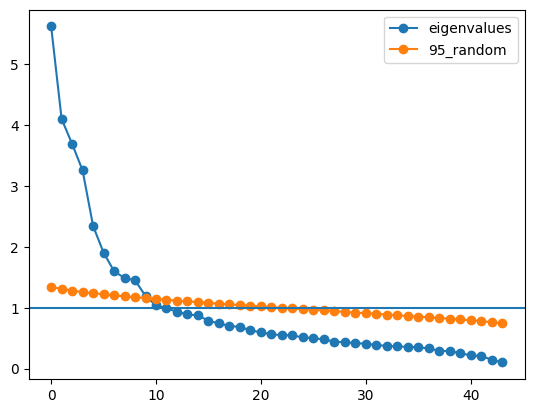

In [14]:
ax = comparison[['eigenvalues','95_random']].plot(marker='o')
plt.axhline(1)
plt.show()

## Minimum Average Partial (MAP) test

Velicer's minimum average partial (MAP) test involves a complete principal components analysis followed by the examination of a series of matrices of partial correlations.

Read more: https://search.r-project.org/CRAN/refmans/EFA.dimensions/html/MAP.html
This code is adapted from https://github.com/cran/EFA.dimensions/blob/master/R/MAP.R

In [15]:
dataset_std = StandardScaler().fit_transform(dataset) # Standardize the dataset

Nvars = dataset_std.shape[1]
Ncases = dataset_std.shape[0]


# Compute the correlation matrix
cormat = np.corrcoef(dataset_std, rowvar=False)

# Perform PCA
eigenvalues, eigenvectors = np.linalg.eig(cormat)
totvarexpl_no_rotation = eigenvalues / np.sum(eigenvalues)

# Calculate loadings
loadings = eigenvectors * np.sqrt(eigenvalues)

fmfm4 = np.full((Nvars, 3), np.nan)
fmfm4[:, 0] = np.arange(Nvars)
fmfm4[0, 1] = (np.sum(cormat**2) - Nvars) / (Nvars * (Nvars - 1))
fmfm4[0, 2] = (np.sum(cormat**4) - Nvars) / (Nvars * (Nvars - 1))

for m in range(1, Nvars):
    a = loadings[:, :m]
    partcov = cormat - np.dot(a, a.T)

    if np.max(partcov) > .0001:
        d = np.diag(1 / np.sqrt(np.diag(partcov)))
        pr = np.dot(np.dot(d, partcov), d)
        fmfm4[m, 1] = (np.sum(pr**2) - Nvars) / (Nvars * (Nvars - 1))
        fmfm4[m, 2] = (np.sum(pr**4) - Nvars) / (Nvars * (Nvars - 1))
    else:
        break

NfactorsMAP = np.nanargmin(fmfm4[:, 1])
NfactorsMAP4 = np.nanargmin(fmfm4[:, 2])

mapOutput = {
    'totvarexplNOROT': totvarexpl_no_rotation,
    'avgsqrs': fmfm4,
    'NfactorsMAP': NfactorsMAP,
    'NfactorsMAP4': NfactorsMAP4
}

print(f"The number of components according to the original (1976) MAP Test is = {NfactorsMAP}")
print(f"The number of components according to the revised (2000) MAP Test is = {NfactorsMAP4}")

The number of components according to the original (1976) MAP Test is = 7
The number of components according to the revised (2000) MAP Test is = 6


# Select the estimation method

Choose between common estimation methods like Maximum Likelihood (ML) and iterated Principal Factor / Axis methods to estimate the relationships between measured variables and factors. This document (https://scholarworks.umass.edu/cgi/viewcontent.cgi?article=1156&context=pare) discusses a few methods. In summary:
* Choosing from the factor analysis extraction methods can be confusing
* Often principal components analysis is used as it's the default
* If data are relatively normally distributed, maximum likelihood is the best
* If data is very not normally distributed, principal factor methods 
* Other authors have argued that in specialized cases, or for particular applications, other extraction techniques (e.g., alpha extraction) are most appropriate, but the evidence of advantage is slim

This document also comments on ML vs. Principal Factor: https://www.researchgate.net/publication/232975051_Factor_recovery_by_principal_axis_factoring_and_maximum_likelihood_factor_analysis_as_a_function_of_factor_pattern_and_sample_size 
* Results showed that PAF is preferred for population solutions with few indicators per factor and for overextraction
* MLFA outperformed PAF in cases of unequal loadings within factors and for underextraction
* It was further shown that PAF and MLFA do not always converge with increasing sample size.

**Maximum likelihood**

In [16]:
fa_ml = FactorAnalyzer(method='ml', n_factors = 6, rotation=None)
fa_ml = fa_ml.fit(dataset)

**Principal factor**

In [17]:
fa_principal = FactorAnalyzer(method='principal', n_factors = 6, rotation=None)
fa_principal = fa_principal.fit(dataset)

**MINRES**
The FactorAnalyzer also provides a MINRES method. The minimum residual (minres) solution is an unweighted least squares solution that takes a slightly different approach. It uses the optim function and adjusts the diagonal elements of the correlation matrix to mimimize the squared residual when the factor model is the eigen value decomposition of the reduced matrix. MINRES and PA will both work when ML will not, for they can be used when the matrix is singular. Although before the change in the derivative, the MINRES solution was slightly more similar to the ML solution than is the PA solution. With the change in the derivative of the minres fit, the minres, pa and uls solutions are practically identical. To a great extent, the minres and wls solutions follow ideas in the factanal function with the change in the derivative.

Source https://www.personality-project.org/r/html/fa.html 

In [18]:
fa_minres = FactorAnalyzer(method='minres', n_factors = 6, rotation=None)
fa_minres = fa_minres.fit(dataset)

## Comparison of loadings for the first two factors

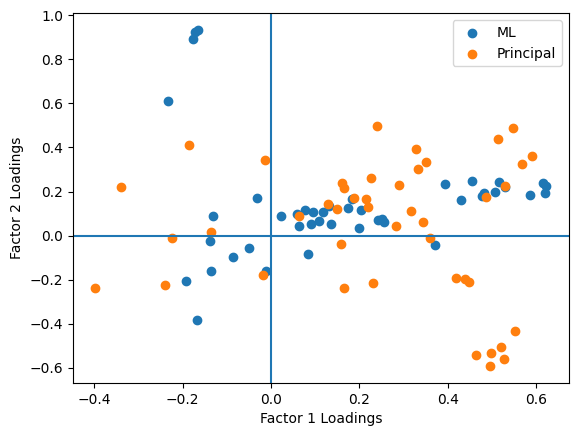

In [19]:
# Create a figure and an axes object
fig, ax = plt.subplots()

# Plot the loadings for each factor analysis method on the same axes object
ax.scatter(x=fa_ml.loadings_[:, 0], y=fa_ml.loadings_[:, 1], label='ML')
ax.scatter(x=fa_principal.loadings_[:, 0], y=fa_principal.loadings_[:, 1], label='Principal')
#ax.scatter(x=fa_minres.loadings_[:, 0], y=fa_minres.loadings_[:, 1], label='MinRes')   # Hidden since it's basically equal to ML

# Set the labels for the axes
ax.set_xlabel("Factor 1 Loadings")
ax.set_ylabel("Factor 2 Loadings")

# Optionally, add a legend to distinguish the different methods
ax.legend()

ax.axhline(0)
ax.axvline(0)

# Show the plot
plt.show()

# Rotate factors

Apply rotation techniques like Varimax or Promax to simplify the factor structure and make it easier to interpret. This is only applicable for Exploratory Factor Analysis and not Confirmatory Factor Analysis. 

There are two categories of rotations https://scholarworks.umass.edu/cgi/viewcontent.cgi?article=1251&context=pare:
* **orthogonal**: Orthogonal rotations produce factors that are uncorrelated (i.e., maintain a 90 degree angle between axes)
* **oblique**: Oblique methods allow the factors to correlate (i.e., allow the X and Y axes to assume a different angle than 90 degrees)

Traditionally, researchers have been guided to orthogonal rotation because (the argument went) uncorrelated factors are more easily interpretable. There is also an argument in favor of orthogonal rotation as the mathematics are simpler, and that made
a significant difference during much of the 20th century when EFA was performed by hand calculations or much more limited computing power. Orthogonal rotations are generally the default setting in most statistical computing packages. 

There does not seem to be a compelling reason for modern researchers to default to orthogonal rotations. In the social sciences (and many other sciences, such as biomedical sciences) we generally expect some correlation among factors, since behavior is rarely partitioned into neatly packaged units that function independently of one another. Therefore using orthogonal rotation potentially results in a less useful solution where factors are correlated. Remembering that EFA is an exploratory technique (not a confirmatory technique), we should be looking for the clearest solution possible. 

Here are the types of rotations available in the Python package:
* varimax (orthogonal rotation)
* promax (oblique rotation): Default option in the Python package
* oblimin (oblique rotation)
* oblimax (orthogonal rotation)
* quartimin (oblique rotation)
* quartimax (orthogonal rotation)
* equamax (orthogonal rotation)

Useful resources: 
* https://hosted.jalt.org/test/PDF/Brown31.pdf
* https://scholarworks.umass.edu/cgi/viewcontent.cgi?article=1251&context=pare

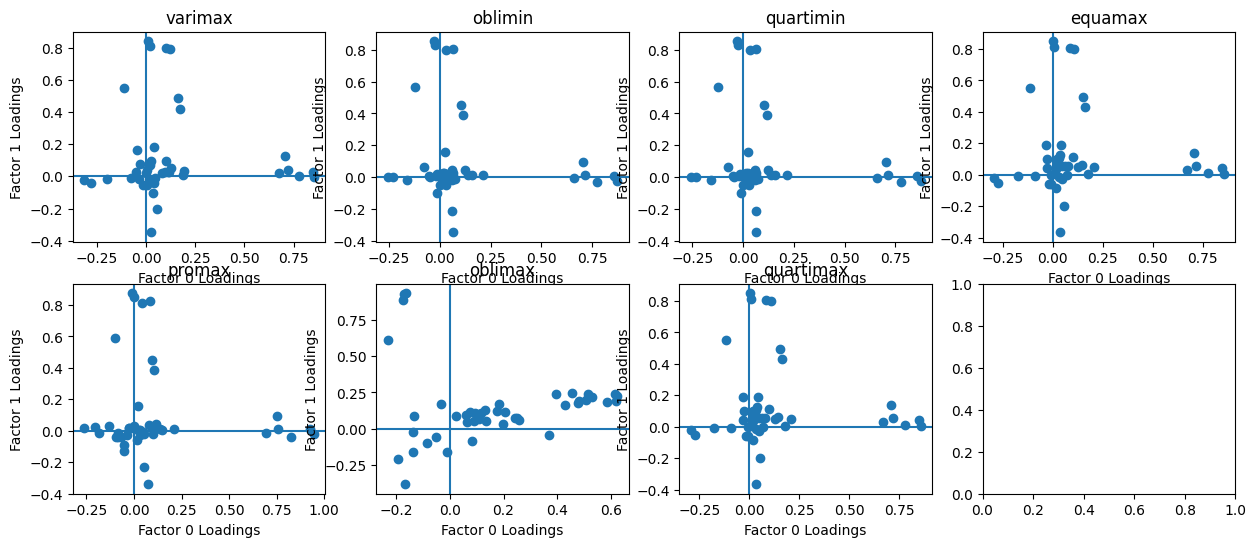

In [20]:
rotations = ["varimax", "promax", "oblimin", "oblimax", "quartimin", "quartimax", "equamax"]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))

# Factor 1 and Factor 2 only here
axis_x = 0
axis_y = 1

for idx, rotation in enumerate(rotations):
    
    fa = FactorAnalyzer(method='ml', n_factors = 6, rotation=rotation).fit(dataset)
    
    i = idx % 2
    j = int(idx / 2)
    
    ax = axes[i, j]  # Get the current axes
    ax.scatter(x=fa.loadings_[:, axis_x], y=fa.loadings_[:, axis_y])  
    ax.set_title(f'Plot ({i+1}, {j+1})')

    # Set the labels for the axes
    ax.set_xlabel(f"Factor {axis_x} Loadings")
    ax.set_ylabel(f"Factor {axis_y} Loadings")
    
    ax.set_title(rotation)

    ax.axhline(0)
    ax.axvline(0)

# Show the plot
plt.show()

Using the first dataset (not the soccer dataset), we see that several options yield clean mappings to the first and second factors. We can repeat this for other dimensions, or we can create the factor matrix with color codes to see how clean the mapping is.

## Factor matrix table

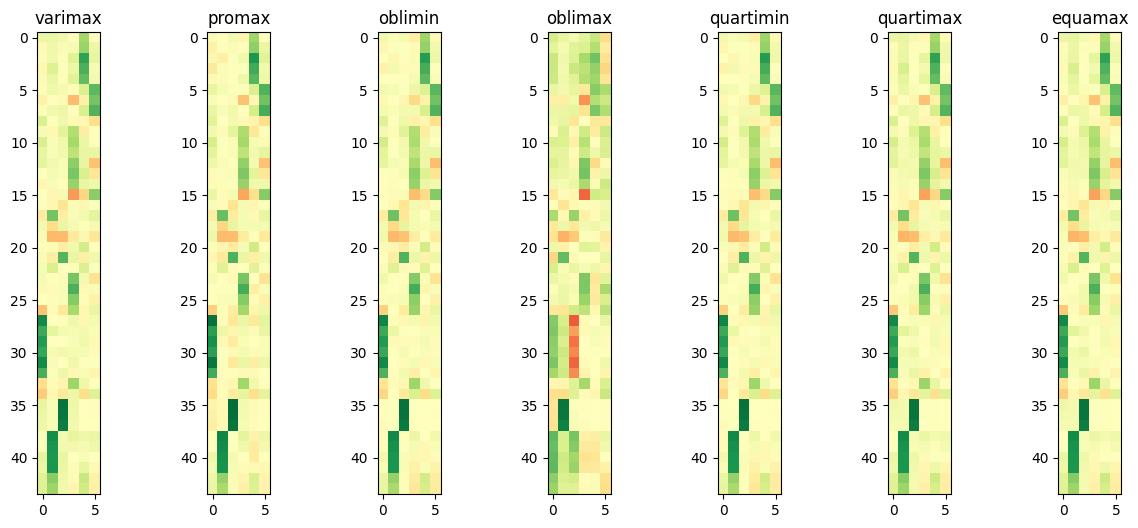

In [21]:
rotations = ["varimax", "promax", "oblimin", "oblimax", "quartimin", "quartimax", "equamax"]
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 6))
for idx, rotation in enumerate(rotations):
    
    fa = FactorAnalyzer(method='ml', n_factors = 6, rotation=rotation).fit(dataset)
    df = pd.DataFrame(fa.loadings_)
    ax = axes[idx]  # Get the current axes
    ax.title.set_text(rotation)
    ax.imshow(df, cmap ="RdYlGn", vmin = -1, vmax = 1)

**Ideally each row should only have one deep red or green color**

Many of these are similar, with oblimax clearly less great. We'll use quartimax as the example going forward

# Interpret the results

Interpret using visualization such as the below and your understanding of the data.

In [22]:
fa = FactorAnalyzer(method='ml', n_factors = 6, rotation='quartimax').fit(dataset)
df = pd.DataFrame(fa.loadings_)
df.index = dataset.columns

In [23]:
df.T.style.background_gradient(cmap ='RdYlGn', vmin = -1, vmax = 1).set_properties(**{'font-size': '10px'}).format(**{'precision':'2'})

,compdom,compgen,riskgen,riskfinan,riskrecrea,indepgen,indephelp,indepprob,commother,commdecis,commfriend,commemp,exprfriend,exprother,exprown,exprhelp_reverse,timesleep,timework,timehouse,timeleisure,timeexc,timecare,timecom,socsupadv,socsuplove,socsupchores,socsuplone,discrgen,discrhire,discred,discrmed,discrpub,discrfam,qualfam,qualfamarg,careemot,carephys,carefut,workspeed,workrep,workemot,workphys,workrisk,workhaz
0,0.10,-0.03,0.03,-0.03,0.04,0.02,-0.09,0.02,0.18,0.05,0.21,0.13,0.15,0.02,-0.03,-0.02,-0.01,-0.11,0.06,0.03,0.03,0.02,0.04,0.07,-0.01,0.02,-0.29,0.86,0.71,0.78,0.72,0.85,0.67,-0.18,-0.27,0.08,0.06,0.05,0.00,0.01,0.11,0.09,0.15,0.16
1,0.11,0.10,0.10,0.19,0.13,0.10,-0.01,0.09,0.01,-0.03,0.05,0.05,0.07,0.06,0.04,-0.06,-0.06,0.55,-0.20,-0.37,-0.01,-0.08,0.19,0.00,0.00,0.03,-0.02,0.01,0.14,0.01,0.05,0.04,0.03,-0.01,-0.05,0.06,0.06,0.05,0.85,0.82,0.80,0.80,0.50,0.43
2,0.06,0.02,0.01,-0.00,0.01,0.04,-0.06,0.08,0.08,0.16,0.10,0.08,0.06,0.07,0.02,0.02,-0.16,-0.12,0.12,-0.33,-0.10,0.64,-0.02,0.02,0.07,0.07,-0.12,0.03,0.08,0.03,0.10,0.04,0.10,-0.04,-0.14,0.94,0.94,0.91,0.04,0.04,0.08,0.07,0.05,0.05
3,-0.04,0.02,0.12,0.06,0.12,0.02,-0.32,-0.02,-0.05,0.34,0.38,0.29,0.45,0.52,0.44,-0.44,0.05,0.03,0.04,-0.10,0.06,0.07,0.01,0.53,0.67,0.49,0.42,0.04,0.01,-0.01,-0.00,0.04,-0.08,0.43,0.13,0.02,0.01,0.00,0.09,0.04,-0.04,-0.05,-0.07,-0.09
4,0.40,0.44,0.75,0.66,0.61,0.19,-0.08,0.21,-0.06,-0.08,0.11,0.12,0.12,0.20,0.13,-0.23,-0.05,0.04,0.03,-0.05,0.21,-0.07,0.17,0.08,0.00,0.04,-0.02,-0.05,0.05,0.06,0.04,-0.02,0.01,0.10,-0.19,0.01,0.01,0.01,0.06,0.02,0.01,0.08,0.24,0.21
5,-0.03,0.07,0.09,0.02,0.03,0.62,0.55,0.64,-0.19,0.02,0.00,0.10,-0.33,-0.17,0.06,0.50,0.01,0.11,0.05,-0.13,-0.02,0.08,-0.00,-0.18,0.02,-0.09,0.10,0.04,0.03,-0.04,-0.04,0.01,-0.06,-0.01,0.16,-0.00,-0.01,0.00,0.07,0.05,-0.02,-0.06,-0.10,-0.11


# Evaluate the factor solution

Assess the adequacy of the solution by considering the internal consistency reliability, theoretical meaningfulness, and the absence of complex loadings.

## Sufficiency test

The test calculates statistics under the null hypothesis that the selected number of factors is sufficient. A p-value of greater than 5% is ideal

In [28]:
stat, degrees, pval = fa.sufficiency(dataset.shape[0])

In [29]:
pval

0.0